In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle 
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

In [3]:
car = pd.read_csv("C:/Users/abink/OneDrive/Desktop/BAI sem 3/4 - ADMN 5016 - Joseph Santarcangelo/data_car.csv")

In [5]:
car.shape

(11914, 16)

In [6]:
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


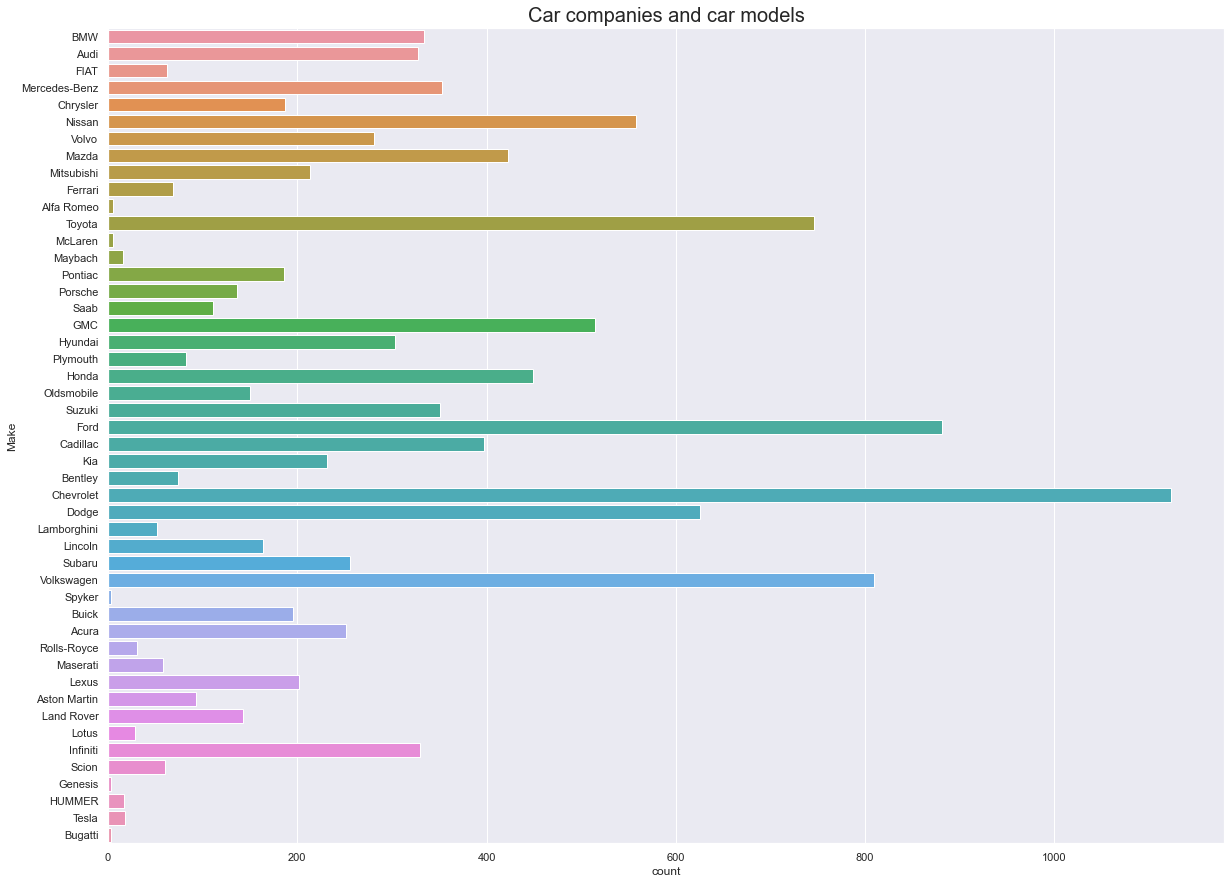

In [8]:
plt.figure(figsize = (20, 15))
sns.countplot(y = car.Make)
plt.title("Car companies and car models", fontsize = 20)
plt.show()

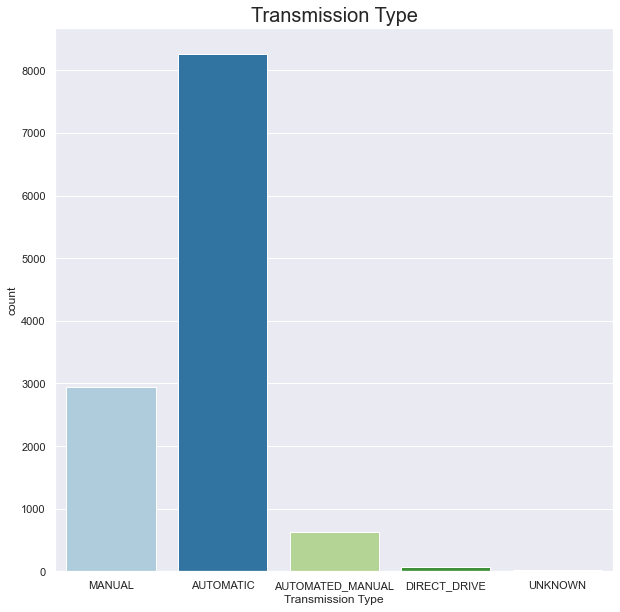

In [9]:
plt.figure(figsize = (10, 10))
sns.countplot(car['Transmission Type'], palette = 'Paired')
plt.title("Transmission Type", fontsize = 20)
plt.show()

<AxesSubplot:xlabel='count', ylabel='Engine Fuel Type'>

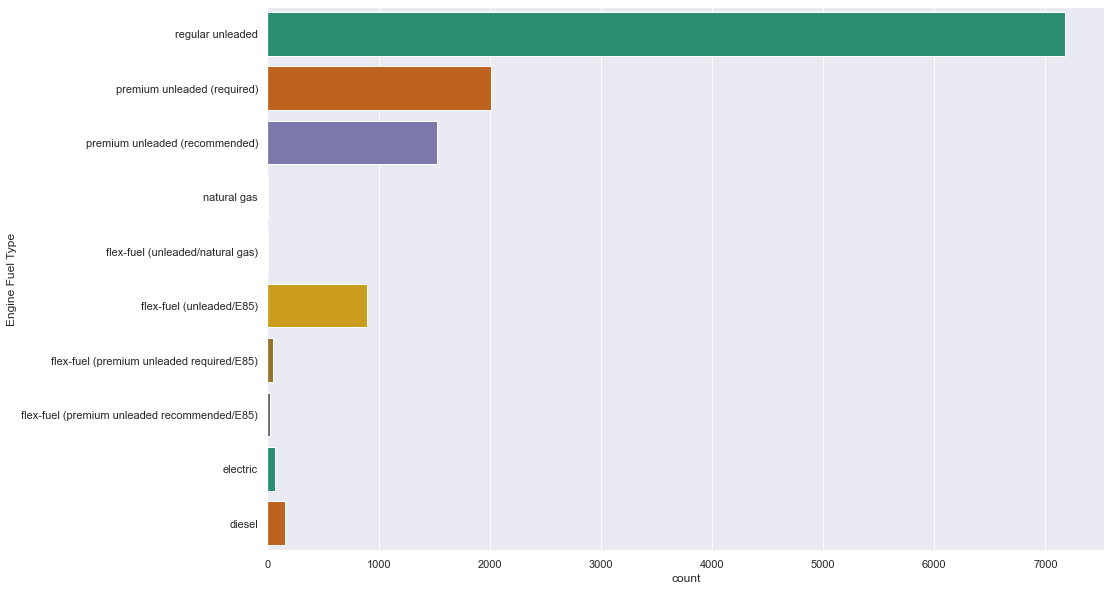

In [12]:
plt.figure(figsize = (15, 10))
sns.countplot(y = car['Engine Fuel Type'].sort_values(ascending = False), palette = 'Dark2')

In [14]:
car.groupby('Make')[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']].agg(['min', 'max', 'mean'])

Engine HP                      Engine Cylinders        \
                    min     max         mean              min   max   
Make                                                                  
Acura             111.0   573.0   244.797619              4.0   6.0   
Alfa Romeo        237.0   237.0   237.000000              4.0   4.0   
Aston Martin      420.0   568.0   484.322581              8.0  12.0   
Audi              108.0   610.0   277.695122              4.0  12.0   
BMW               170.0   600.0   326.907186              0.0  12.0   
Bentley           400.0   631.0   533.851351              8.0  12.0   
Bugatti          1001.0  1001.0  1001.000000             16.0  16.0   
Buick             138.0   310.0   219.244898              4.0   8.0   
Cadillac          140.0   640.0   332.309824              4.0   8.0   
Chevrolet          55.0   650.0   246.972247              0.0   8.0   
Chrysler          100.0   385.0   229.139037              4.0   8.0   
Dodge              92.0   707.0   244.415335              4.0  10.0   
FIAT              101.0   180.0   143.559322              0.0   4.0   
Ferrari           400.0   731.0   511.956522              8.0  12.0   
Ford               63.0   662.0   243.097926              0.0   8.0   
GMC               105.0   420.0   259.844660              4.0   8.0   
Genesis           311.0   420.0   347.333333              6.0   8.0   
HUMMER            239.0   300.0   261.235294              5.0   8.0   
Honda              62.0   280.0   195.749441              0.0   6.0   
Hyundai            81.0   429.0   201.917492              4.0   8.0   
Infiniti          145.0   420.0   310.066667              4.0   8.0   
Kia               125.0   420.0   206.827434              0.0   8.0   
Lamborghini       550.0   750.0   614.076923             10.0  12.0   
Land Rover        174.0   550.0   322.097902              4.0   8.0   
Lexus             134.0   552.0   277.415842              4.0  10.0   
Lincoln           188.0   380.0   284.910256              4.0   8.0   
Lotus             189.0   400.0   275.965517              4.0   8.0   
Maserati          345.0   523.0   420.793103              6.0   8.0   
Maybach           543.0   631.0   590.500000             12.0  12.0   
Mazda              82.0   274.0   171.992908              4.0   6.0   
McLaren           562.0   641.0   610.400000              8.0   8.0   
Mercedes-Benz     121.0   641.0   350.181818              0.0  12.0   
Mitsubishi         66.0   320.0   173.429245              3.0   8.0   
Nissan             90.0   600.0   239.921533              0.0   8.0   
Oldsmobile        110.0   275.0   177.466667              4.0   8.0   
Plymouth           92.0   253.0   131.560976              4.0   6.0   
Pontiac            74.0   415.0   190.295699              4.0   8.0   
Porsche           208.0   605.0   392.794118              4.0  10.0   
Rolls-Royce       322.0   624.0   487.548387              8.0  12.0   
Saab              150.0   390.0   220.522523              4.0   8.0   
Scion              94.0   200.0   154.433333              4.0   4.0   
Spyker            400.0   400.0   400.000000              8.0   8.0   
Subaru             66.0   305.0   197.308594              3.0   6.0   
Suzuki             66.0   261.0   160.287749              4.0   6.0   
Tesla               NaN     NaN          NaN              0.0   0.0   
Toyota             93.0   381.0   236.147849              0.0   8.0   
Volkswagen         81.0   444.0   189.757726              4.0  12.0   
Volvo             114.0   345.0   230.971530              4.0   6.0   

                         highway MPG                 city mpg                  
                    mean         min  max       mean      min  max       mean  
Make                                                                           
Acura           5.333333          17   38  28.111111       13   39  19.940476  
Alfa Romeo      4.000000          34   34  34.000000       24   24  24.0

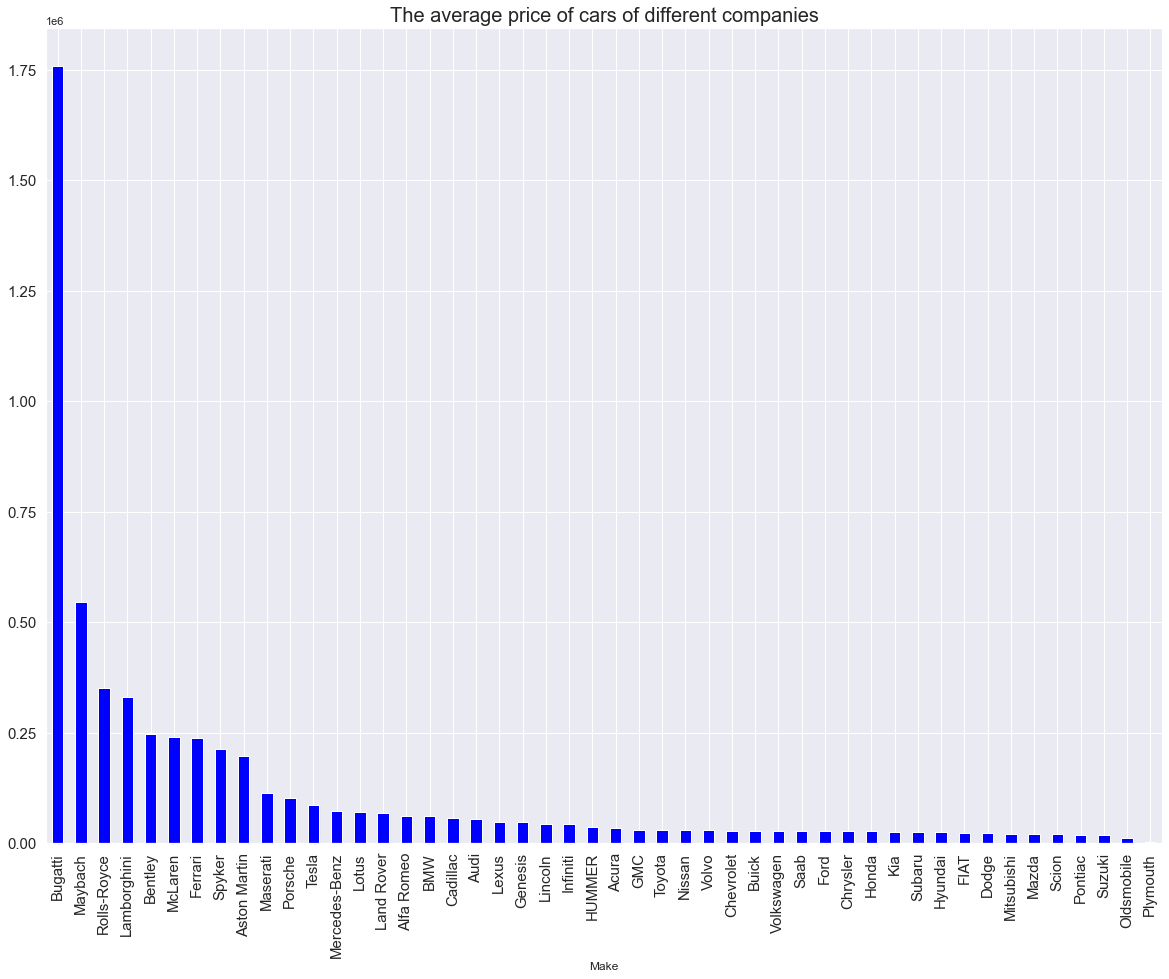

In [16]:
plt.figure(figsize = (20, 15))
car.groupby(['Make']).mean()['MSRP'].sort_values(ascending = False).plot(kind = 'bar', fontsize = 15, color = 'blue')
plt.title("The average price of cars of different companies", fontsize = 20)
plt.show()

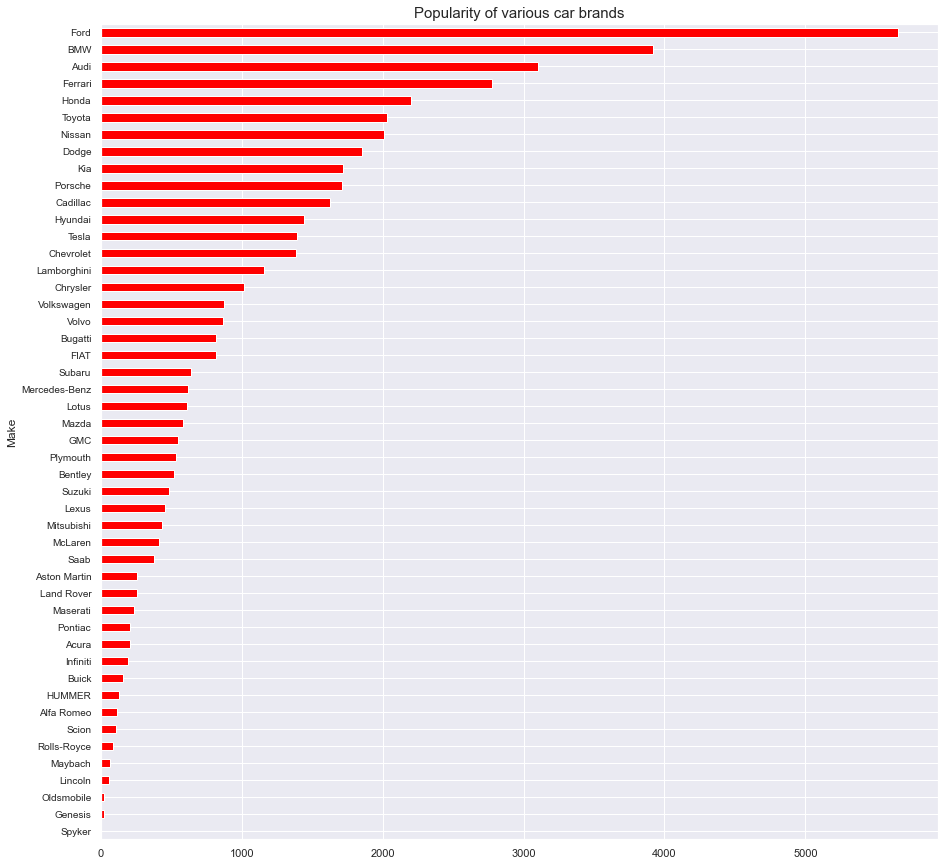

In [18]:
plt.figure(figsize = (15, 15))
car.groupby('Make').mean()['Popularity'].sort_values(ascending = True).plot(kind = 'barh', color = 'red')
plt.yticks(fontsize = 10)
plt.title("Popularity of various car brands", fontsize = 15)
plt.show()

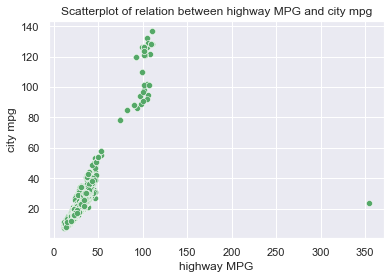

In [19]:
sns.scatterplot(x = 'highway MPG', y = 'city mpg', data = car, color = 'g')
plt.title("Scatterplot of relation between highway MPG and city mpg")
plt.show()

In [22]:
car[car['highway MPG'] > 300]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [23]:
car = car[car['highway MPG'] < 300]

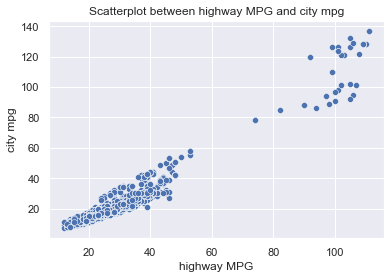

In [25]:
sns.scatterplot(x = 'highway MPG', y ='city mpg', data = car, color = 'b')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

<AxesSubplot:xlabel='highway MPG'>

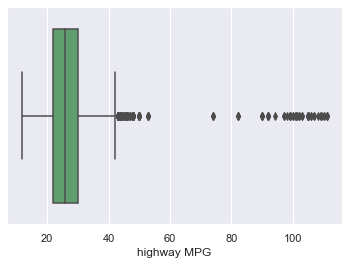

In [26]:
sns.boxplot(x = 'highway MPG', data = car, color = 'g')

In [27]:
car = car[car['highway MPG'] < 60]

<AxesSubplot:xlabel='highway MPG'>

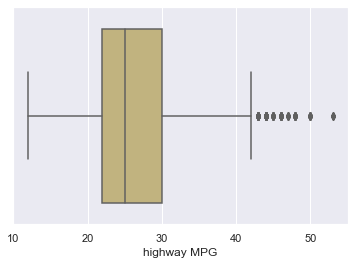

In [28]:
sns.boxplot(x = 'highway MPG', data = car, color = 'y')

<AxesSubplot:xlabel='city mpg'>

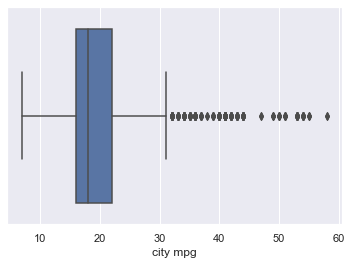

In [29]:
sns.boxplot(x = 'city mpg', data = car)

In [30]:
car = car[car['city mpg'] < 40]

<AxesSubplot:xlabel='city mpg'>

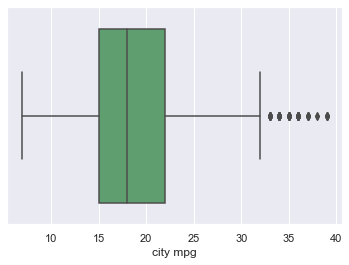

In [32]:
sns.boxplot(x = 'city mpg', data= car, color = 'g')

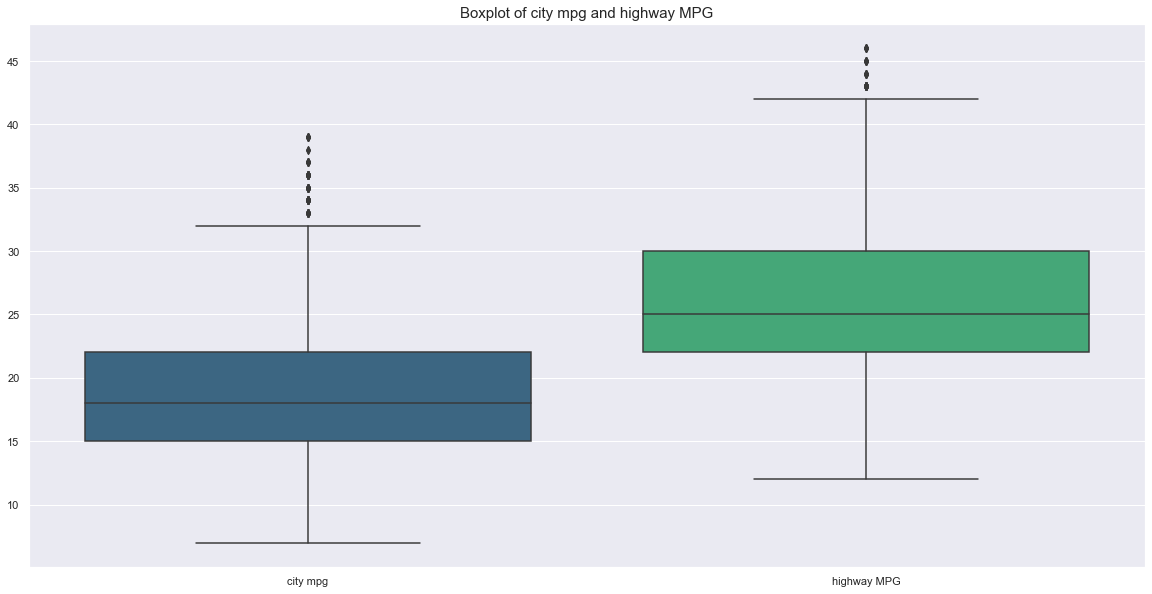

In [33]:
#description of two features.(city mpg, highway MPG)
plt.figure(figsize = (20, 10))
sns.boxplot(data = car[['city mpg', 'highway MPG']], palette = 'viridis')
plt.title("Boxplot of city mpg and highway MPG", fontsize = 15)
plt.show()

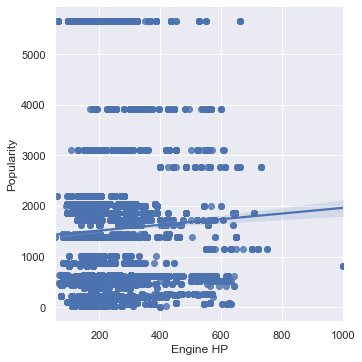

In [34]:
#relationship between engine hp and popularity(positive)
sns.set(rc = {'figure.figsize': (20, 20)})
sns.lmplot(x = 'Engine HP', y = 'Popularity', data = car)

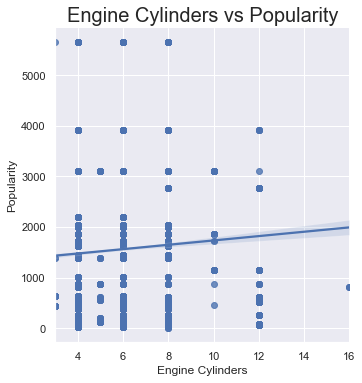

In [35]:
# releationship between no.of cylinder and popularity (positive)
sns.lmplot(x = 'Engine Cylinders', y = 'Popularity', data = car)
plt.title("Engine Cylinders vs Popularity", fontsize = 20)
plt.show()

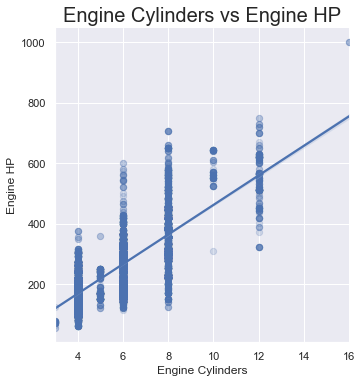

In [37]:
#releationship between no.of cylinder and engine hp (positive +)
sns.lmplot(x = 'Engine Cylinders', y = 'Engine HP', scatter_kws = {"s": 40, "alpha": 0.2}, data = car)
plt.title("Engine Cylinders vs Engine HP", fontsize = 20)
plt.show()

In [39]:
#checking for missing values
car.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              21
Engine Cylinders       20
Transmission Type       0
Driven_Wheels           0
Number of Doors         1
Market Category      3737
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [40]:
car['Number of Doors'].median()

4.0

In [41]:
#filling missing value with median
car['Number of Doors'].fillna(4.0, inplace = True)

In [45]:
#creating new column
car['Present Year'] = 2022

In [46]:
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Present Year
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2022
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,2022
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,2022
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,2022
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,2022


In [47]:
#creating new column
car['Years Of Manufacture'] = car['Present Year'] - car['Year']

In [49]:
car.drop(['Present Year'], inplace = True, axis = 1)

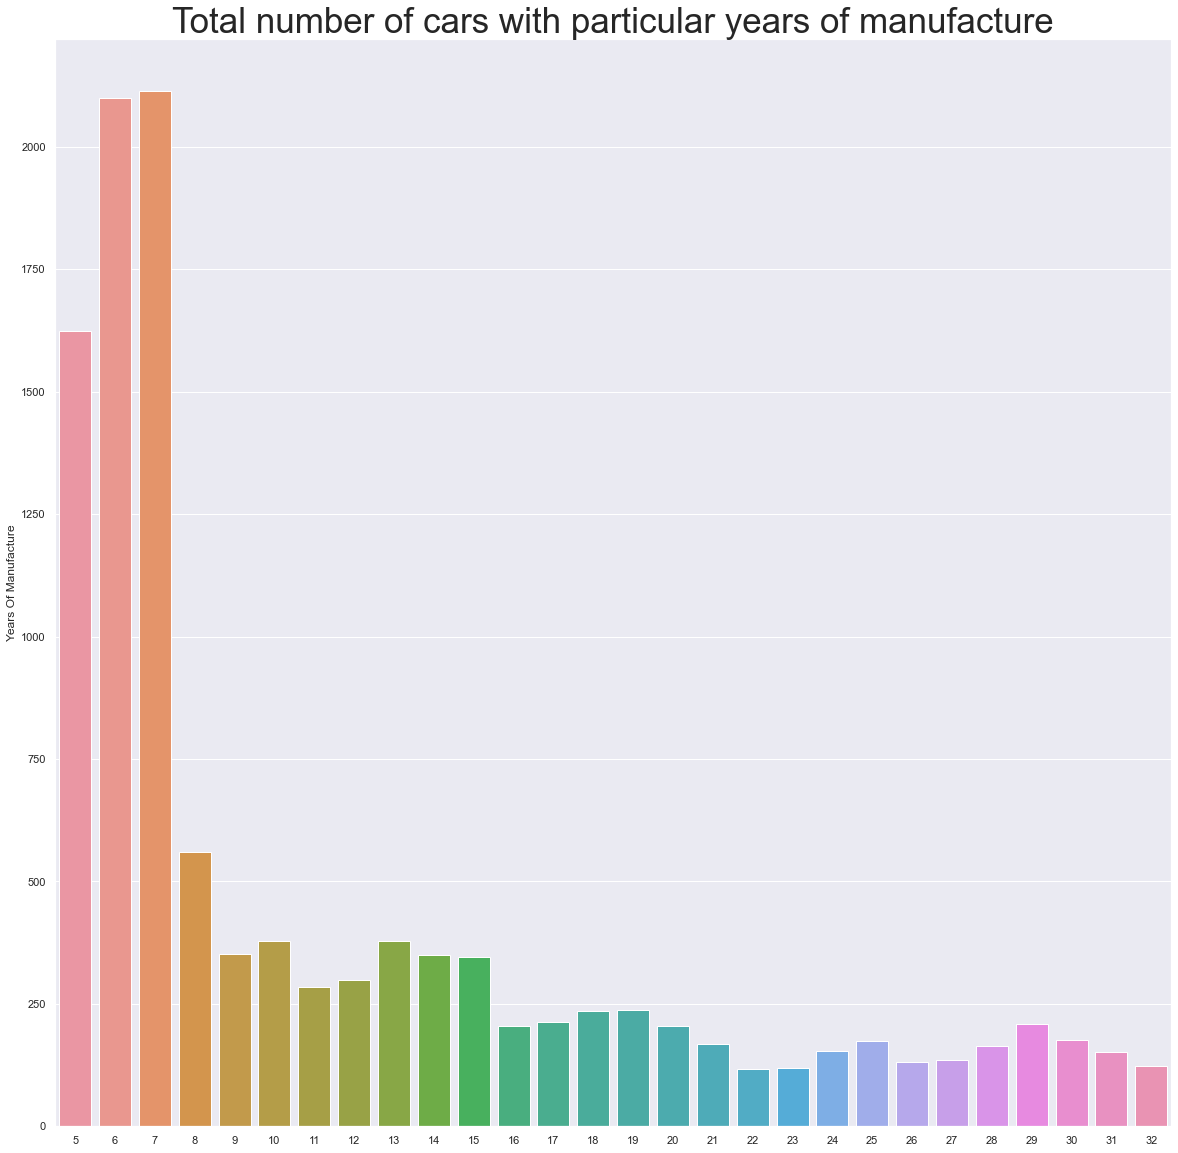

In [52]:
sns.barplot(y = car['Years Of Manufacture'].value_counts(), x = car['Years Of Manufacture'].value_counts().index)
plt.title("Total number of cars with particular years of manufacture", fontsize = 35)
plt.show()

In [53]:
car.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Fuel Type           3
Engine HP                 21
Engine Cylinders          20
Transmission Type          0
Driven_Wheels              0
Number of Doors            0
Market Category         3737
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years Of Manufacture       0
dtype: int64

In [54]:
car['Engine HP'].mean()

250.75316672372475

In [56]:
#filling missing values with median
car['Engine HP'].fillna(car['Engine HP'].median(), inplace = True)

In [57]:
car['Engine HP'].isnull().sum()

0

In [58]:
car['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12., 10.,  3., nan, 16.])

In [69]:
#Filling missing values  
car['Engine Cylinders'].fillna(3, inplace = True)

In [70]:
car['Engine Cylinders'].isnull().sum()

0

In [61]:
car.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Fuel Type           3
Engine HP                  0
Engine Cylinders           0
Transmission Type          0
Driven_Wheels              0
Number of Doors            0
Market Category         3737
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years Of Manufacture       0
dtype: int64

In [62]:
#droping column Market Category
car.drop(['Market Category'], inplace = True, axis = 1)

In [63]:
car.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
Years Of Manufacture    0
dtype: int64

In [65]:
car['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'flex-fuel (premium unleaded recommended/E85)',
       'natural gas', 'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [67]:
car['Engine Fuel Type'].fillna("car['Engine Fuel Type'].mode()", inplace = True)

In [73]:
car['Engine Fuel Type'].isnull().sum()

0

In [71]:
car.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
Years Of Manufacture    0
dtype: int64

In [74]:
#shuffling data fro randomness
shuffled_data = shuffle(car, random_state = 100)
X = shuffled_data.drop(['MSRP'], axis = 1)
y = shuffled_data['MSRP']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [77]:
#converting data into numerical feature
encoder = TargetEncoder(cols = 'Year')

In [78]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
8844,Honda,S2000,2008,premium unleaded (required),237.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,25,18,2202,14
5311,Mercedes-Benz,GLE-Class Coupe,2016,premium unleaded (required),577.0,8.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,18,14,617,6
8098,Dodge,RAM 250,1992,regular unleaded,180.0,6.0,MANUAL,rear wheel drive,2.0,Large,Regular Cab Pickup,17,13,1851,30
3982,Buick,Envision,2017,flex-fuel (unleaded/E85),197.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,4dr SUV,29,22,155,5
10314,Scion,tC,2015,regular unleaded,179.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,31,23,105,7


In [79]:
encoder.fit(X_train['Year'], y_train.to_frame()['MSRP'] )

TargetEncoder(cols=['Year'])

In [80]:
X_train['Year'] = encoder.transform(X_train['Year'])

In [81]:
X_test['Year'] = encoder.transform(X_test['Year'])

In [82]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
8844,Honda,S2000,46537.842105,premium unleaded (required),237.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,25,18,2202,14
5311,Mercedes-Benz,GLE-Class Coupe,47835.476760,premium unleaded (required),577.0,8.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,18,14,617,6
8098,Dodge,RAM 250,2085.166667,regular unleaded,180.0,6.0,MANUAL,rear wheel drive,2.0,Large,Regular Cab Pickup,17,13,1851,30
3982,Buick,Envision,42900.100349,flex-fuel (unleaded/E85),197.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,4dr SUV,29,22,155,5
10314,Scion,tC,46453.964000,regular unleaded,179.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,31,23,105,7


In [83]:
encoder = TargetEncoder(cols = 'Model')
encoder.fit(X_train['Model'], y_train.to_frame()['MSRP'])
X_train['Model'] = encoder.transform(X_train['Model'])
X_test['Model'] = encoder.transform(X_test['Model'])

In [84]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
8844,Honda,36104.081086,46537.842105,premium unleaded (required),237.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,25,18,2202,14
5311,Mercedes-Benz,86378.562065,47835.476760,premium unleaded (required),577.0,8.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,18,14,617,6
8098,Dodge,2024.001583,2085.166667,regular unleaded,180.0,6.0,MANUAL,rear wheel drive,2.0,Large,Regular Cab Pickup,17,13,1851,30
3982,Buick,40106.538563,42900.100349,flex-fuel (unleaded/E85),197.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,4dr SUV,29,22,155,5
10314,Scion,22122.193444,46453.964000,regular unleaded,179.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,31,23,105,7


In [85]:
encoder = TargetEncoder(cols = 'Make')
encoder.fit(X_train['Make'], y_train.to_frame()['MSRP'])
X_train['Make'] = encoder.transform(X_train['Make'])
X_test['Make'] = encoder.transform(X_test['Make'])

In [86]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
8844,26883.135338,36104.081086,46537.842105,premium unleaded (required),237.0,4.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,25,18,2202,14
5311,67738.416342,86378.562065,47835.476760,premium unleaded (required),577.0,8.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr SUV,18,14,617,6
8098,23185.543182,2024.001583,2085.166667,regular unleaded,180.0,6.0,MANUAL,rear wheel drive,2.0,Large,Regular Cab Pickup,17,13,1851,30
3982,27766.924812,40106.538563,42900.100349,flex-fuel (unleaded/E85),197.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,4dr SUV,29,22,155,5
10314,20667.222222,22122.193444,46453.964000,regular unleaded,179.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,31,23,105,7


In [87]:
#creating dummy variable foe categorical columns
encoder = OneHotEncoder()
encoder.fit(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_train = encoder.transform(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_test = encoder.transform(X_test[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])

In [88]:
X_train = pd.concat([X_train, one_hot_encoded_output_train], axis = 1)
X_test = pd.concat([X_test, one_hot_encoded_output_test], axis = 1)

In [89]:
X_train.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)
X_test.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)

In [90]:
X_train.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Years Of Manufacture,...,Vehicle Style_7,Vehicle Style_8,Vehicle Style_9,Vehicle Style_10,Vehicle Style_11,Vehicle Style_12,Vehicle Style_13,Vehicle Style_14,Vehicle Style_15,Vehicle Style_16
8844,26883.135338,36104.081086,46537.842105,237.0,4.0,2.0,25,18,2202,14,...,0,0,0,0,0,0,0,0,0,0
5311,67738.416342,86378.562065,47835.476760,577.0,8.0,4.0,18,14,617,6,...,0,0,0,0,0,0,0,0,0,0
8098,23185.543182,2024.001583,2085.166667,180.0,6.0,2.0,17,13,1851,30,...,0,0,0,0,0,0,0,0,0,0
3982,27766.924812,40106.538563,42900.100349,197.0,4.0,4.0,29,22,155,5,...,0,0,0,0,0,0,0,0,0,0
10314,20667.222222,22122.193444,46453.964000,179.0,4.0,2.0,31,23,105,7,...,0,0,0,0,0,0,0,0,0,0


In [92]:
#normalizing the data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_1 = scaler.transform(X_train)
X_test_1 = scaler.transform(X_test)

In [93]:
X_train_1.shape

(8193, 47)

In [94]:
#linear Regression
model = LinearRegression()
model.fit(X_train_new, y_train)

LinearRegression()

In [95]:
y_predict = model.predict(X_test_1)

In [96]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

In [97]:
y_predict.head()

,Predicted Output
0,18989.487373
1,3548.955374
2,70124.659484
3,16956.845456
4,287313.905161


In [101]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

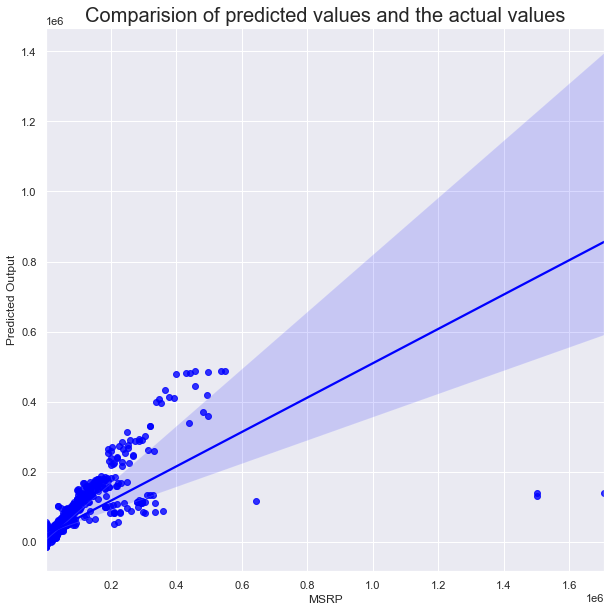

In [103]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'blue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [105]:
#Support vector machnine
model = SVR()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop =True)], axis = 1, ignore_index = False)

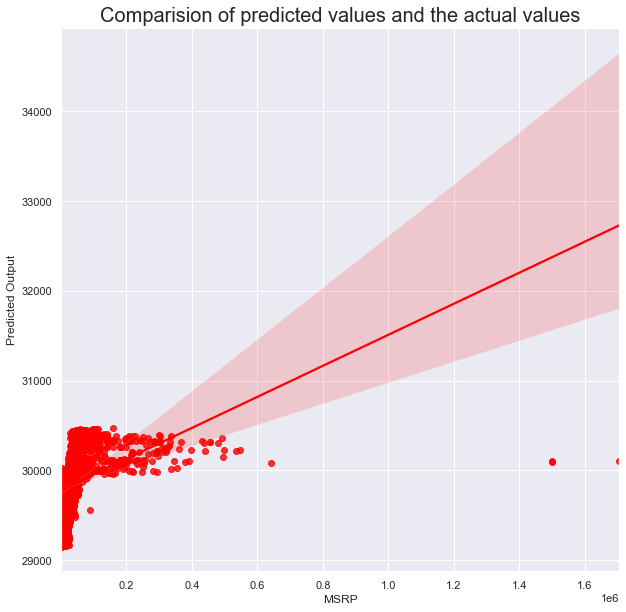

In [106]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'red', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [108]:
#K-nearest neighbors
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

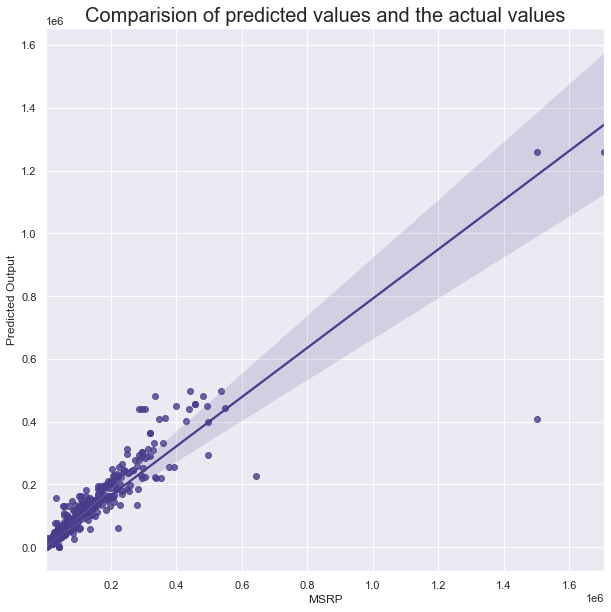

In [109]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'darkslateblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()